In [25]:
import sys
sys.path.append('..')
from src.data_loader import download_stock_data, get_data_info
from src.strategy import calculate_sma, generate_signals

#other esssential libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14,7)


In [26]:
ticker = 'COALINDIA.NS'
print(f" downloading {ticker} stock data...")
df = download_stock_data(ticker, period="5y", interval ="1d")


 downloading COALINDIA.NS stock data...


Succesfully downloaded 1239 rows of data

Date range: 2021-01-25 to 2026-01-23


In [27]:
get_data_info(df)


Data Information
Total rows:1239
Date range: 2021-01-25 to 2026-01-23

 columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

 Missing values: Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
                                Open       High        Low      Close  \
Date                                                                    
2021-01-25 00:00:00+05:30  87.187585  87.575377  84.570026  85.216339   
2021-01-27 00:00:00+05:30  85.313278  85.668752  83.180444  83.471283   
2021-01-28 00:00:00+05:30  82.728024  83.988332  82.598763  82.857285   
2021-01-29 00:00:00+05:30  83.535912  83.794433  80.950661  81.370766   
2021-02-01 00:00:00+05:30  81.693932  83.859078  81.338458  83.374344   

                             Volume  Dividends  Stock Splits  
Date                                                          
2021-01-25 00:00:00+05:30  10157077        0.0     

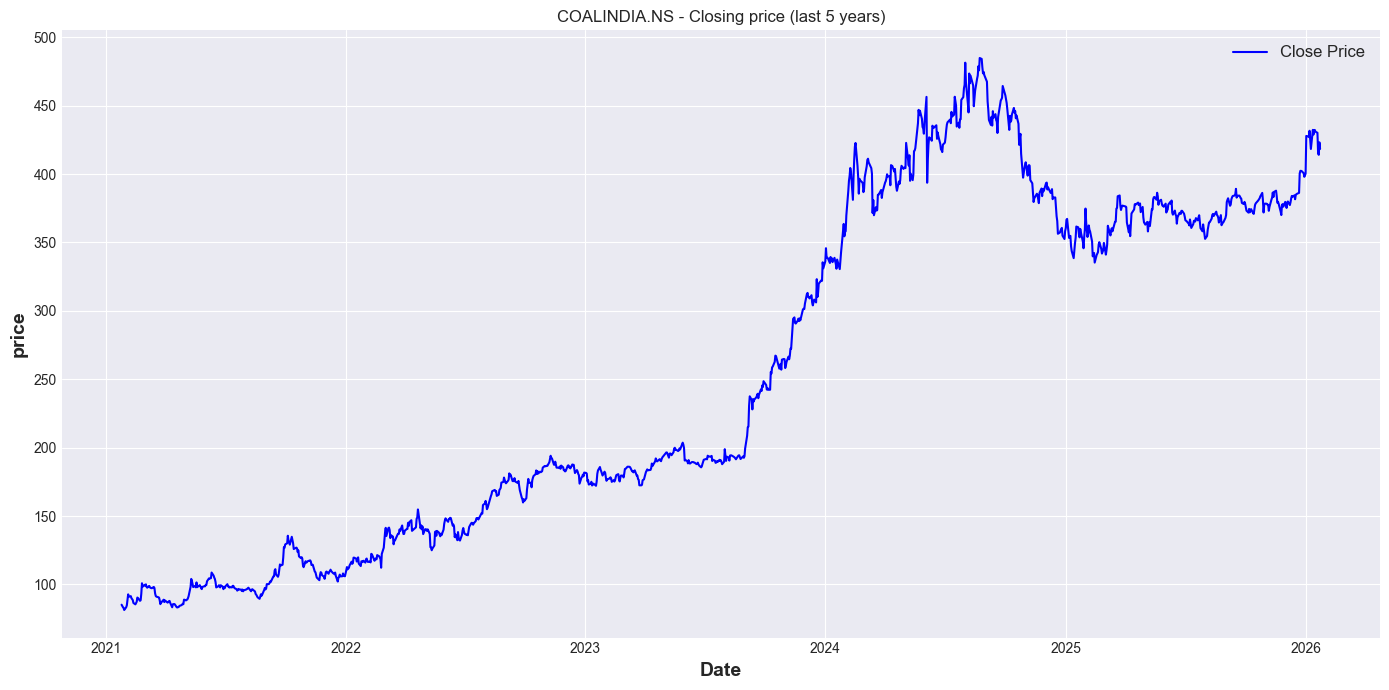

In [28]:
plt.plot(df.index, df['Close'], label = 'Close Price', color = 'blue', linewidth = '1.5')
plt.title(f"{ticker} - Closing price (last 5 years)")
plt.xlabel("Date", fontsize = 14, fontweight = 'bold')
plt.ylabel("price", fontsize = 14, fontweight = 'bold')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(True)
plt.show()

In [29]:
df_SMA = calculate_sma(df, short_window=20, long_window=50)
df_SMA[['Close','SMA_20', 'SMA_50']].tail(10)

Calculated SMA 20 and SMA 50


,Close,SMA_20,SMA_50
Date,,,
2026-01-12 00:00:00+05:30,432.299988,405.939999,390.204000
2026-01-13 00:00:00+05:30,428.899994,408.304999,391.231000
2026-01-14 00:00:00+05:30,432.200012,410.677499,392.324000
2026-01-15 00:00:00+05:30,432.200012,413.022501,393.505001
2026-01-16 00:00:00+05:30,431.000000,415.292500,394.605001
2026-01-19 00:00:00+05:30,430.149994,417.487500,395.581000
2026-01-20 00:00:00+05:30,415.299988,418.232500,396.231000
2026-01-21 00:00:00+05:30,414.049988,418.817499,396.782000
2026-01-22 00:00:00+05:30,423.200012,419.859999,397.582000


In [30]:
df_signals = generate_signals(df_SMA)

df_signals[['Close','SMA_20','SMA_50','Position','Signal']].tail(10)

Buy signals:15
Sell signals:14


,Close,SMA_20,SMA_50,Position,Signal
Date,,,,,
2026-01-12 00:00:00+05:30,432.299988,405.939999,390.204000,1,0.0
2026-01-13 00:00:00+05:30,428.899994,408.304999,391.231000,1,0.0
2026-01-14 00:00:00+05:30,432.200012,410.677499,392.324000,1,0.0
2026-01-15 00:00:00+05:30,432.200012,413.022501,393.505001,1,0.0
2026-01-16 00:00:00+05:30,431.000000,415.292500,394.605001,1,0.0
2026-01-19 00:00:00+05:30,430.149994,417.487500,395.581000,1,0.0
2026-01-20 00:00:00+05:30,415.299988,418.232500,396.231000,1,0.0
2026-01-21 00:00:00+05:30,414.049988,418.817499,396.782000,1,0.0
2026-01-22 00:00:00+05:30,423.200012,419.859999,397.582000,1,0.0


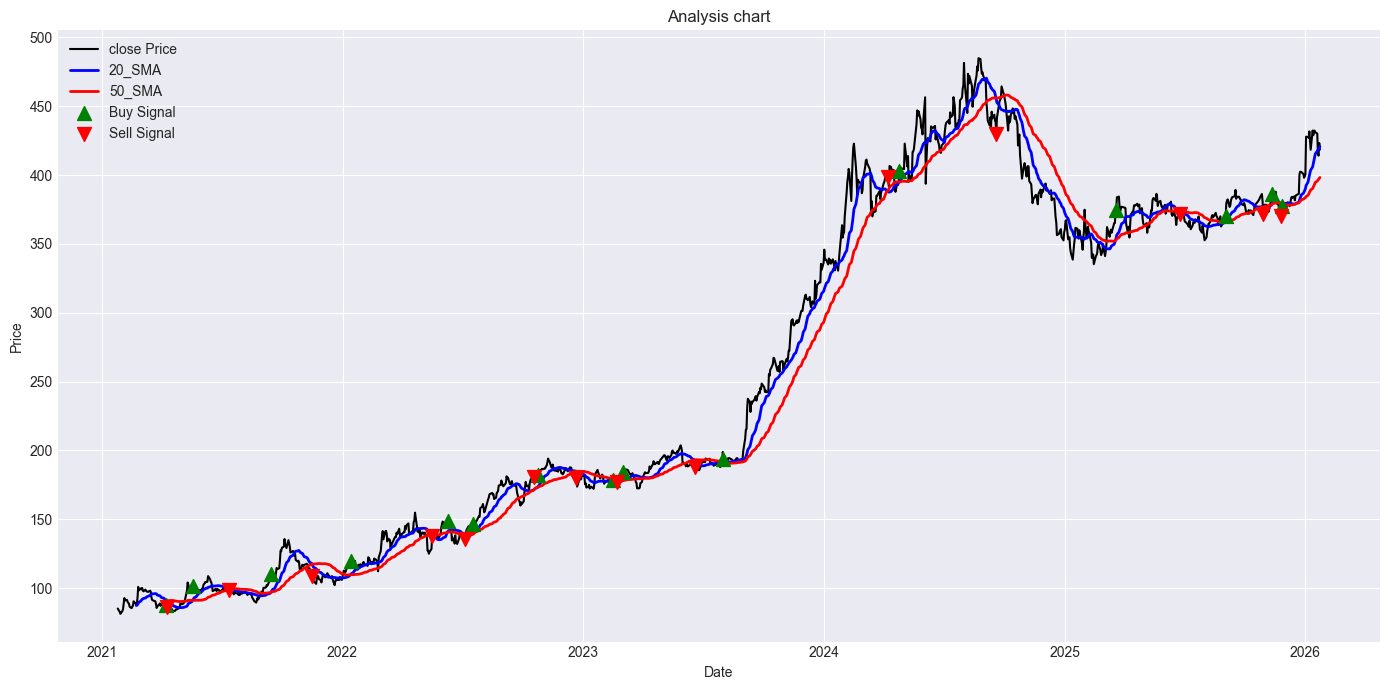

In [31]:
fig, ax = plt.subplots(figsize = (14,7))

ax.plot(df_signals['Close'], linewidth =1.5, label = 'close Price', color ='black')
ax.plot(df_signals['SMA_20'], linewidth = 2, label = '20_SMA', color = 'blue')
ax.plot(df_signals['SMA_50'], linewidth = 2, label = '50_SMA', color = 'red')

buy_signals = df_signals[df_signals['Signal'] == 1]
sell_signals = df_signals[df_signals['Signal']==-1]

ax.scatter(buy_signals.index, buy_signals['Close'], marker= '^',color = 'green', s= 100, label = 'Buy Signal', zorder = 5)
ax.scatter(sell_signals.index, sell_signals['Close'], marker = 'v', color = 'red', s = 100, zorder =5, label = 'Sell Signal')
ax.set_title("Analysis chart")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.tight_layout()
plt.show()

In [32]:
def backtest_strategy(df_signals, initial_capital = 100000):
    
    df_backtest = df_signals.copy()
    
    df_backtest['Daily_returns'] = df_backtest['Close'].pct_change()
    df_backtest['Strategy_returns'] = df_backtest['Daily_returns'] * df_backtest['Position'].shift(1)
    
    df_backtest['Cumulative_Market_Return'] = (1 + df_backtest['Daily_returns']).cumprod()
    df_backtest['Cumulative_Strategy_Return'] = ( 1+ df_backtest['Strategy_returns']).cumprod()
    
    df_backtest['Market_Value'] = initial_capital * df_backtest['Cumulative_Market_Return']
    df_backtest['Strategy_Value'] = initial_capital * df_backtest['Cumulative_Strategy_Return']
    
    df_backtest.fillna({'Market_Value': initial_capital}, inplace = True)
    df_backtest.fillna({'Strategy_Value': initial_capital}, inplace = True)
    
    return df_backtest

print("Backtest running...")
backtest = backtest_strategy(df_signals, initial_capital=100000)

    

Backtest running...
